In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

/tmp/ipykernel_12267/2534501517.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
# read results from csv
problem_sets = [
    "Bohachevsky",
    "Booth",
    "Borehole",
    "CurrinExp",
    "Hartman3",
    "Hartman6",
    "Park91A",
    "Park91B",
    "Sixhump",
]

# create a dataframe to store results
mf_rbf_gpr_results = pd.DataFrame()
# use a for loop to read all csv files
for problem_set in problem_sets:
    input = pd.read_csv("../" + problem_set + "/exp_mf_rbf_gpr_input.csv", index_col=0)
    output = pd.read_csv(
        "../" + problem_set + "/exp_mf_rbf_gpr_output.csv", index_col=0
    )
    # merge input and output dataframes
    df = pd.merge(input, output, left_index=True, right_index=True)

    # add df to results
    mf_rbf_gpr_results = pd.concat([mf_rbf_gpr_results, df])

# remove the case of mf_Himmelblau


# load the results from the gpr experiments
gpr_input = pd.read_csv("../gpr_expriments/exp_gpr_input.csv", index_col=0)
gpr_output = pd.read_csv("../gpr_expriments/exp_gpr_output.csv", index_col=0)
# merge input and output dataframes
gpr_results = pd.merge(gpr_input, gpr_output, left_index=True, right_index=True)

In [9]:
# add one more column to calculate the error of noise_level
mf_rbf_gpr_results["noise_error"] = np.abs(
    mf_rbf_gpr_results["noise_std"] - mf_rbf_gpr_results["learned_noise_std"]
)
gpr_results["noise_error"] = np.abs(
    gpr_results["noise_std"] - gpr_results["learned_noise_std"]
)

In [10]:
# data frame
mf_rbf_gpr_results_noise_1 = mf_rbf_gpr_results[mf_rbf_gpr_results["noise_std"] == 0.1]
gpr_results_noise_1 = gpr_results[gpr_results["noise_std"] == 0.1]
mf_rbf_gpr_results_noise_3 = mf_rbf_gpr_results[mf_rbf_gpr_results["noise_std"] == 0.3]
gpr_results_noise_3 = gpr_results[gpr_results["noise_std"] == 0.3]
mf_rbf_gpr_results_noise_5 = mf_rbf_gpr_results[mf_rbf_gpr_results["noise_std"] == 0.5]
gpr_results_noise_5 = gpr_results[gpr_results["noise_std"] == 0.5]

In [11]:
# create a new dataframe of  mf_rbf_kriging_results with num_lf from 25 to 100 with step 10
# and num_hf from 2 to 20 with step 4
mf_rbf_kriging_results_new = pd.DataFrame()
for num_lf in [120, 160, 200, 240, 280, 300]:
    num_lf = int(num_lf)
    for num_hf in [5, 20, 50, 100]:
        num_hf = int(num_hf)
        mf_rbf_kriging_results_new = pd.concat(
            [
                mf_rbf_kriging_results_new,
                mf_rbf_gpr_results_noise_3[
                    (mf_rbf_gpr_results_noise_3["num_lf"] == num_lf)
                    & (mf_rbf_gpr_results_noise_3["num_hf"] == num_hf)
                ],
            ]
        )

In [12]:
mf_rbf_kriging_results_new

,noise_std,num_hf,num_lf,problem,seed,progress,normalized_mae,normalized_rmse,r2,log_likelihood,learned_noise_std,cpu_time,noise_error
1,0.3,5,120,mf_Bohachevsky,1,finished,0.671074,0.096362,0.977924,-48872.408741,0.000167,6.020222,0.299833
601,0.3,5,120,mf_Bohachevsky,2,finished,0.441938,0.070109,0.988104,-3353.583012,0.629608,5.141773,0.329608
1201,0.3,5,120,mf_Bohachevsky,3,finished,0.343377,0.059690,0.991478,-3939.971720,1.199619,6.504781,0.899619
1801,0.3,5,120,mf_Bohachevsky,4,finished,0.512543,0.071816,0.987794,-38797.325788,0.000172,8.134374,0.299828
2401,0.3,5,120,mf_Bohachevsky,5,finished,0.664087,0.103143,0.974740,-33080.635813,0.000152,5.055711,0.299848
...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,0.3,100,300,mf_Sixhump,1,finished,0.363281,0.050894,0.998649,-1609.245199,0.471477,31.132229,0.171477
1198,0.3,100,300,mf_Sixhump,2,finished,0.497083,0.046003,0.998879,-1270.602274,0.364972,44.212649,0.064972
1798,0.3,100,300,mf_Sixhump,3,finished,0.249990,0.024194,0.999693,-786.552080,0.289934,43.669737,0.010066
2398,0.3,100,300,mf_Sixhump,4,finished,0.246833,0.051762,0.998585,-1667.445354,0.457481,30.946162,0.157481


/tmp/ipykernel_12267/1257924442.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations_mean = pivot_table["mean"].applymap(
/tmp/ipykernel_12267/1257924442.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table["std"].applymap("{:.2f}".format).astype(str).values
/tmp/ipykernel_12267/1257924442.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table_noise_error["mean"].applymap(
/tmp/ipykernel_12267/1257924442.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table_noise_error["std"].applymap("{:.2f}".format).astype(str).values
/tmp/ipykernel_12267/1257924442.py:55: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table_cpu_time["mean"].applymap("{:.2f}".format).astype(str).values
/tmp/ipykernel_12267/1257924442.py:59: FutureWarning: DataFrame.applymap has been

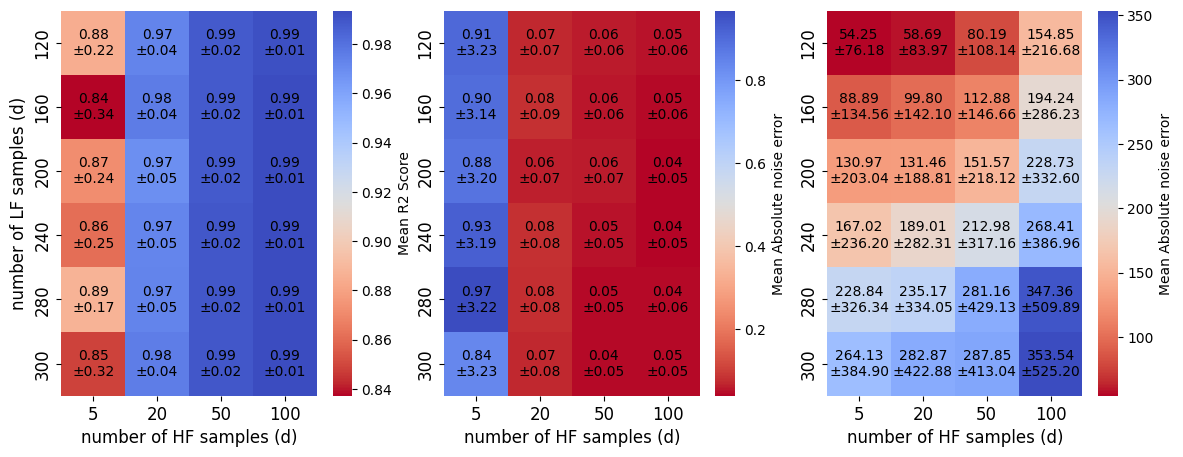

In [13]:
# Create a pivot table for num_lf, num_hf, mean, and std of r2
pivot_table = mf_rbf_kriging_results_new.pivot_table(
    values="r2", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values
annotations_mean = pivot_table["mean"].applymap("{:.2f}".format).astype(str).values
annotations_std = "±" + pivot_table["std"].applymap("{:.2f}".format).astype(str).values

# Combine annotations
annotations_combined = [
    f"{m}\n{s}" for m, s in zip(annotations_mean.flatten(), annotations_std.flatten())
]
annotations_combined = np.array(annotations_combined).reshape(annotations_mean.shape)

# create a pivot table for num_lf, num_hf, mean, and std of noise_error
pivot_table_noise_error = mf_rbf_kriging_results_new.pivot_table(
    values="noise_error", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values for noise_error
annotations_mean_noise_error = (
    pivot_table_noise_error["mean"].applymap("{:.2f}".format).astype(str).values
)
annotations_std_noise_error = (
    "±" + pivot_table_noise_error["std"].applymap("{:.2f}".format).astype(str).values
)


# combine annotations for noise_error
annotations_combined_noise_error = [
    f"{m}\n{s}"
    for m, s in zip(
        annotations_mean_noise_error.flatten(),
        annotations_std_noise_error.flatten(),
    )
]
annotations_combined_noise_error = np.array(annotations_combined_noise_error).reshape(
    annotations_mean_noise_error.shape
)


# Create a pivot table for num_lf, num_hf, mean, and std of cpu_time
pivot_table_cpu_time = mf_rbf_kriging_results_new.pivot_table(
    values="cpu_time", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values for cpu_time
annotations_mean_cpu_time = (
    pivot_table_cpu_time["mean"].applymap("{:.2f}".format).astype(str).values
)
annotations_std_cpu_time = (
    "±" + pivot_table_cpu_time["std"].applymap("{:.2f}".format).astype(str).values
)

# Combine annotations for cpu_time
annotations_combined_cpu_time = [
    f"{m}\n{s}"
    for m, s in zip(
        annotations_mean_cpu_time.flatten(), annotations_std_cpu_time.flatten()
    )
]
annotations_combined_cpu_time = np.array(annotations_combined_cpu_time).reshape(
    annotations_mean_cpu_time.shape
)

# Create a combined heatmap for cpu_time
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

sns.heatmap(
    pivot_table["mean"],
    annot=annotations_combined,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={"label": "Mean R2 Score"},
    annot_kws={"color": "black"},
    ax=ax[0],
)
ax[0].set_xlabel("number of HF samples (d)", fontsize=12)
ax[0].set_ylabel("number of LF samples (d)", fontsize=12)
ax[0].set_xticklabels([5, 20, 50, 100], fontsize=12)
ax[0].set_yticklabels([120, 160, 200, 240, 280, 300], fontsize=12)

# Create a combined heatmap for noise_error
sns.heatmap(
    pivot_table_noise_error["mean"],
    annot=annotations_combined_noise_error,
    fmt="",
    cmap="coolwarm_r",
    annot_kws={"color": "black"},
    cbar_kws={"label": "Mean Absolute noise error"},
    ax=ax[1],
)

ax[1].set_xlabel("number of HF samples (d)", fontsize=12)
ax[1].set_ylabel(" ", fontsize=12)
ax[1].set_xticklabels([5, 20, 50, 100], fontsize=12)
ax[1].set_yticklabels([120, 160, 200, 240, 280, 300], fontsize=12)

sns.heatmap(
    pivot_table_cpu_time["mean"],
    annot=annotations_combined_cpu_time,
    fmt="",
    cmap="coolwarm_r",
    annot_kws={"color": "black"},
    cbar_kws={"label": "Mean Absolute noise error"},
    ax=ax[2],
)
plt.xlabel("number of HF samples (d)", fontsize=12)
plt.ylabel(" ", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("mf_rbf_gpr_sample_influence.png", dpi=300, bbox_inches="tight")
plt.savefig("mf_rbf_gpr_sample_influence.pdf", dpi=300, bbox_inches="tight")
plt.savefig("mf_rbf_gpr_sample_influence.svg", dpi=300, bbox_inches="tight")
plt.show()

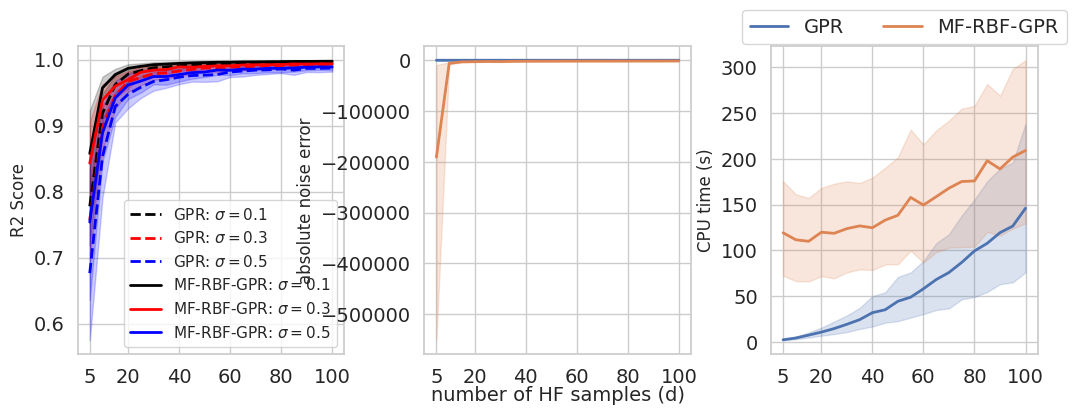

In [10]:
# get the results for 120 samples
mf_rbf_gpr_200 = mf_rbf_gpr_results_noise_3[mf_rbf_gpr_results_noise_3["num_lf"] == 200]
mf_rbf_gpr_200_1 = mf_rbf_gpr_results_noise_1[
    mf_rbf_gpr_results_noise_1["num_lf"] == 200
]
mf_rbf_gpr_200_5 = mf_rbf_gpr_results_noise_5[
    mf_rbf_gpr_results_noise_5["num_lf"] == 200
]


font_size = 12
# Create subplots for each metric
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plotting
sns.lineplot(
    data=gpr_results_noise_1,
    x="num_sample",
    y="r2",
    linewidth=2,
    linestyle="--",
    color="black",
    label=r"GPR: $\sigma = 0.1$",
    ax=axes[0],
)
sns.lineplot(
    data=gpr_results_noise_3,
    x="num_sample",
    y="r2",
    linewidth=2,
    linestyle="--",
    color="red",
    label=r"GPR: $\sigma = 0.3$",
    ax=axes[0],
)
sns.lineplot(
    data=gpr_results_noise_5,
    x="num_sample",
    y="r2",
    linewidth=2,
    linestyle="--",
    color="blue",
    label=r"GPR: $\sigma = 0.5$",
    ax=axes[0],
)
sns.lineplot(
    data=mf_rbf_gpr_200_1,
    x="num_hf",
    y="r2",
    linewidth=2,
    linestyle="-",
    color="black",
    label=r"MF-RBF-GPR: $\sigma = 0.1$",
    ax=axes[0],
)

sns.lineplot(
    data=mf_rbf_gpr_200,
    x="num_hf",
    y="r2",
    linewidth=2,
    linestyle="-",
    color="red",
    label=r"MF-RBF-GPR: $\sigma = 0.3$",
    ax=axes[0],
)
sns.lineplot(
    data=mf_rbf_gpr_200_5,
    x="num_hf",
    y="r2",
    linewidth=2,
    linestyle="-",
    color="blue",
    label=r"MF-RBF-GPR: $\sigma = 0.5$",
    ax=axes[0],
)
axes[0].set_xticks([5, 20, 40, 60, 80, 100])
axes[0].set_xlabel(" ", fontsize=font_size)
axes[0].set_ylabel("R2 Score", fontsize=font_size)

# Plotting rmse
sns.lineplot(
    data=gpr_results_noise_3,
    x="num_sample",
    y="noise_error",
    linewidth=2,
    ax=axes[1],
)
sns.lineplot(
    data=mf_rbf_gpr_200,
    x="num_hf",
    y="log_likelihood",
    linewidth=2,
    ax=axes[1],
)
axes[1].set_xlabel(" ", fontsize=font_size)
axes[1].set_xticks([5, 20, 40, 60, 80, 100])
axes[1].set_ylabel("absolute noise error", fontsize=font_size)
# axes[1].set_ylim([0, 0.5])

sns.lineplot(
    data=gpr_results_noise_3,
    x="num_sample",
    linewidth=2,
    y="cpu_time",
    label="GPR",
    ax=axes[2],
)
sns.lineplot(
    data=mf_rbf_gpr_200,
    x="num_hf",
    linewidth=2,
    y="cpu_time",
    label="MF-RBF-GPR",
    ax=axes[2],
)

axes[2].set_xlabel(" ", fontsize=font_size)
axes[2].set_ylabel("CPU time (s)", fontsize=font_size)
axes[2].set_xticks([5, 20, 40, 60, 80, 100])

# set font size
font_size = 14
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2, fontsize=font_size)
plt.subplots_adjust(left=0.1, right=0.9, wspace=0.3)
axes[0].tick_params(labelsize=font_size)
axes[1].tick_params(labelsize=font_size)
axes[2].tick_params(labelsize=font_size)
# add text at the bottom with the number of samples
axes[0].text(
    1.8,
    -0.15,
    "number of HF samples (d)",
    fontsize=font_size,
    transform=axes[0].transAxes,
    horizontalalignment="center",
)

# # zoomed in plot
# ax_inset0 = plt.axes([0.16, 0.2, 0.15, 0.40])
# sns.lineplot(
#     data=gpr_results_noise_3,
#     x="num_sample",
#     y="r2",
#     linewidth=2,
#     ax=ax_inset0,
# )
# sns.lineplot(
#     data=mf_rbf_gpr_200,
#     x="num_hf",
#     y="r2",
#     linewidth=2,
#     ax=ax_inset0,
# )

# ax_inset0.set_xlim([15.0, 100.0])
# ax_inset0.set_ylim([0.95, 1.00])
# ax_inset0.legend().set_visible(False)
# ax_inset0.set_xlabel("")
# ax_inset0.set_ylabel("")


# # zoomed in plot
# ax_inset1 = plt.axes([0.45, 0.4, 0.15, 0.40])
# sns.lineplot(
#     data=gpr_results_noise_3,
#     x="num_sample",
#     y="noise_error",
#     linewidth=2,
#     ax=ax_inset1,
# )
# sns.lineplot(
#     data=mf_rbf_gpr_200,
#     x="num_hf",
#     y="noise_error",
#     linewidth=2,
#     ax=ax_inset1,
# )

# ax_inset1.set_xlim([15.0, 100.0])
# ax_inset1.set_ylim([0.02, 0.2])
# ax_inset1.legend().set_visible(False)
# ax_inset1.set_xlabel("")
# ax_inset1.set_ylabel("")
# Adjust layout
# plt.savefig("gpr_comparison_at_200lf_samples.png",
#             dpi=300, bbox_inches="tight")
# plt.savefig("gpr_comparison_at_200lf_samples.pdf",
#             dpi=300, bbox_inches="tight")
# plt.savefig("gpr_comparison_at_200lf_samples.svg",
#             dpi=300, bbox_inches="tight")

plt.show()

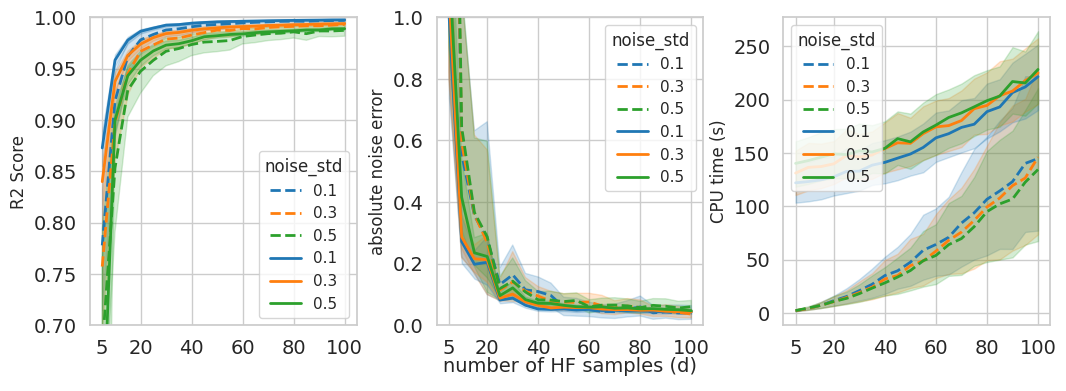

In [9]:
# get the results for 120 samples


font_size = 12
sns.set(style="whitegrid")
# Create subplots for each metric
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
# Plotting

sns.lineplot(
    data=gpr_results,
    x="num_sample",
    y="r2",
    hue="noise_std",
    linestyle="--",
    linewidth=2,
    palette="tab10",
    ax=axes[0],
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    y="r2",
    hue="noise_std",
    palette="tab10",
    linewidth=2,
    ax=axes[0],
)

axes[0].set_xticks([5, 20, 40, 60, 80, 100])
axes[0].set_xlabel(" ", fontsize=font_size)
axes[0].set_ylabel("R2 Score", fontsize=font_size)
axes[0].set_ylim([0.7, 1.0])
# Plotting rmse
sns.lineplot(
    data=gpr_results,
    x="num_sample",
    y="noise_error",
    hue="noise_std",
    palette="tab10",
    linewidth=2,
    linestyle="--",
    ax=axes[1],
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    hue="noise_std",
    y="noise_error",
    palette="tab10",
    linewidth=2,
    ax=axes[1],
)
axes[1].set_xlabel(" ", fontsize=font_size)
axes[1].set_xticks([5, 20, 40, 60, 80, 100])
axes[1].set_ylabel("absolute noise error", fontsize=font_size)
axes[1].set_ylim([0, 1])

sns.lineplot(
    data=gpr_results,
    x="num_sample",
    hue="noise_std",
    linewidth=2,
    linestyle="--",
    palette="tab10",
    y="cpu_time",
    ax=axes[2],
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    linewidth=2,
    hue="noise_std",
    y="cpu_time",
    palette="tab10",
    ax=axes[2],
)

axes[2].set_xlabel(" ", fontsize=font_size)
axes[2].set_ylabel("CPU time (s)", fontsize=font_size)
axes[2].set_xticks([5, 20, 40, 60, 80, 100])


# set font size
font_size = 14
plt.subplots_adjust(left=0.1, right=0.9, wspace=0.3)
axes[0].tick_params(labelsize=font_size)
axes[1].tick_params(labelsize=font_size)
axes[2].tick_params(labelsize=font_size)
# add text at the bottom with the number of samples
axes[0].text(
    1.8,
    -0.15,
    "number of HF samples (d)",
    fontsize=font_size,
    transform=axes[0].transAxes,
    horizontalalignment="center",
)

plt.savefig("gpr_comparison_at_different_lf_noise.png", dpi=300, bbox_inches="tight")
plt.savefig("gpr_comparison_at_different_lf_noise.pdf", dpi=300, bbox_inches="tight")
plt.savefig("gpr_comparison_at_different_lf_noise.svg", dpi=300, bbox_inches="tight")

plt.show()